In [11]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_json('Taraz/ТАРАЗ КВАРТИРА ВРЕМЯНКА ДОМ СДАМ СНИМУ ПОДСЕЛЕНИЕ/json/result.json')

df = json_normalize(df['messages'])
channel_name = df['from'].dropna().iloc[0]
df = df[['date', 'text_entities']]

In [84]:
df.head()

,date,text_entities
0,2024-04-06T05:27:15,[]
1,2024-04-06T06:05:51,[]
2,2024-04-06T06:22:20,[]
3,2024-04-06T06:24:50,[]
4,2024-04-06T06:30:29,[]


In [85]:
df = df[df['text_entities'].apply(lambda x: isinstance(x, list) and len(x) > 0)]

def extract_message(text_entities):
    try:
        # Concatenate the 'text' fields from each dictionary in the list
        return ''.join([entity['text'] for entity in text_entities if 'text' in entity])
    except:
        return None

# Apply the function to create a new 'message' column
df['message'] = df['text_entities'].apply(extract_message)

# Drop the 'text_entities' column as it is no longer needed
df_cleaned = df.drop(columns=['text_entities'])
df_cleaned = df_cleaned.sort_values(by='date', ascending=False)
df_cleaned

,date,message
147,2024-10-27T18:50:36,Микрдан
146,2024-10-27T18:50:31,50 Ден 70 колеминде
145,2024-10-27T18:50:04,1 2 болмели кв керек еди узак мерзимге семейны...
144,2024-10-27T18:48:22,Ассалаумагалеикум
139,2024-10-25T11:11:46,"Жас отбасы, 2 кишкентай балапандарымен"
...,...,...
23,2024-07-13T08:35:00,Микраион дардан
22,2024-07-13T08:34:41,Саламатсыздарма ищу квартира
20,2024-07-01T08:27:19,Поселениеге 3 кыз керек.барлык жагдайы жасалга...
16,2024-05-11T20:53:14,Поселение 3 комнат квартира


In [ ]:
df_cleaned.to_csv('Taraz/ТАРАЗ КВАРТИРА ВРЕМЯНКА ДОМ СДАМ СНИМУ ПОДСЕЛЕНИЕ/json/result.csv', index=False)

In [ ]:
# Convert the 'date' column to datetime format for easier resampling
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Set the 'date' column as the index for easier time-based grouping
df_cleaned.set_index('date', inplace=True)

# Count the number of messages per day
daily_counts = df_cleaned.resample('D').size()
daily_average = daily_counts.mean()
print(f'Күніне орта есеппен хабарландыру саны: {daily_average:.2f}')

# Count the number of messages per week
weekly_counts = df_cleaned.resample('W').size()
weekly_average = weekly_counts.mean()
print(f'Аптасына орта есеппен хабарландыру саны: {weekly_average:.2f}')

# Count the number of messages per month
monthly_counts = df_cleaned.resample('M').size()
monthly_average = monthly_counts.mean()
print(f'Айына орта есеппен хабарландыру саны: {monthly_average:.2f}')

# Count the number of messages per year
yearly_counts = df_cleaned.resample('Y').size()
yearly_average = yearly_counts.mean()
print(f'Жылына орта есеппен хабарландыру саны: {yearly_average:.2f}')




Күніне орта есеппен хабарландыру саны: 19.18
Аптасына орта есеппен хабарландыру саны: 133.39
Айына орта есеппен хабарландыру саны: 576.92
Жылына орта есеппен хабарландыру саны: 5769.25


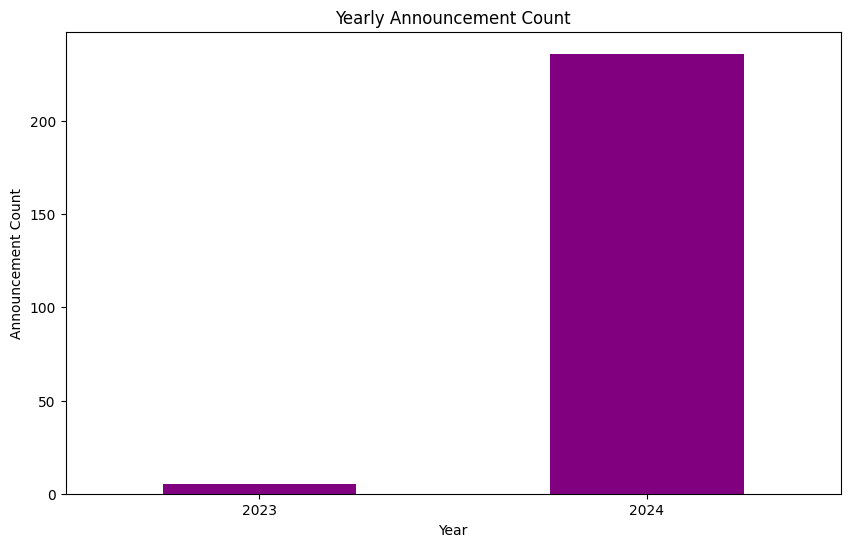

In [272]:
# Ensure the index is in datetime format and extract only the year
yearly_counts.index = yearly_counts.index.year

# Yearly average announcements plot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='purple')
plt.title('Yearly Announcement Count')
plt.xlabel('Year')
plt.ylabel('Announcement Count')
plt.xticks(rotation=0)  # Keep years aligned horizontally
plt.show()


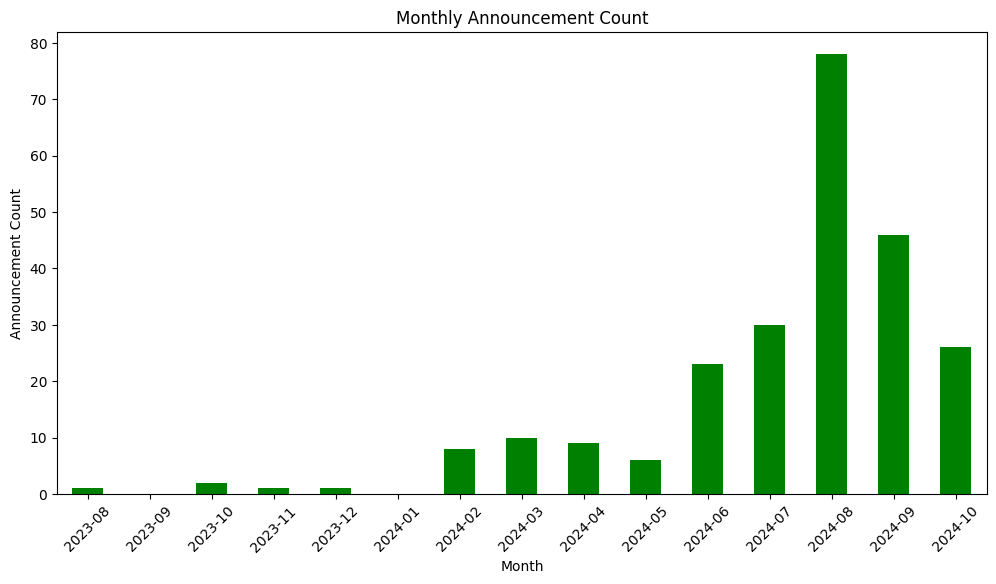

In [273]:
# Extract year and month for monthly counts
monthly_counts.index = monthly_counts.index.to_period('M')

# Monthly average announcements plot
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='green')
plt.title('Monthly Announcement Count')
plt.xlabel('Month')
plt.ylabel('Announcement Count')
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()


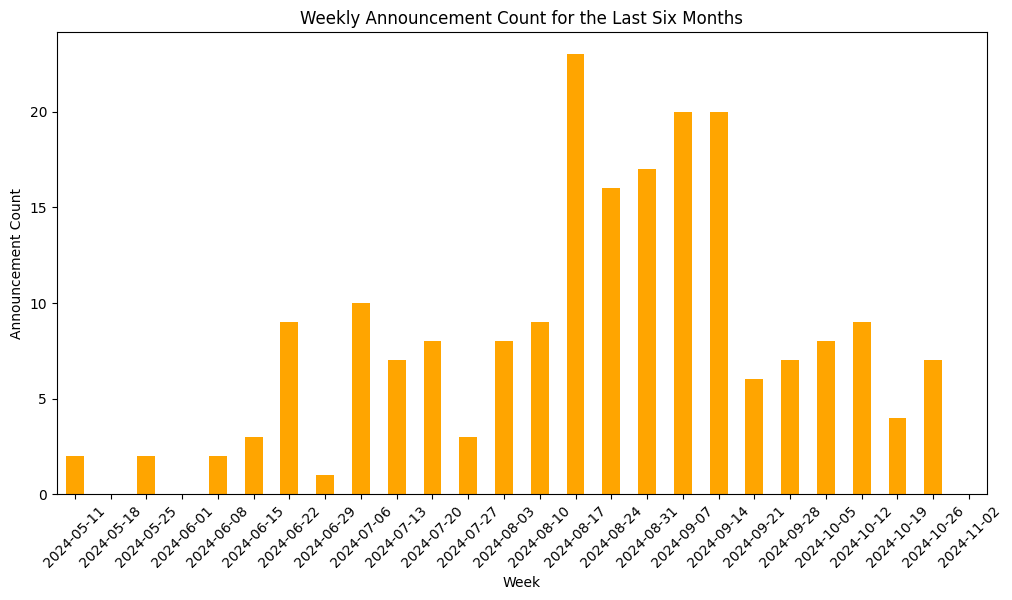

In [274]:
# Weekly average announcements plot
from datetime import timedelta

# Get the current date and filter the last 6 months
end_date = df_cleaned.index.max()
start_date = end_date - pd.DateOffset(months=6)
weekly_counts_last_6_months = weekly_counts[(weekly_counts.index >= start_date) & (weekly_counts.index <= end_date)]

# Format the index to display only the end date of each week
weekly_counts_last_6_months.index = (weekly_counts_last_6_months.index + timedelta(days=6)).strftime('%Y-%m-%d')

# Plot weekly announcement counts for the last 6 months
plt.figure(figsize=(12, 6))
weekly_counts_last_6_months.plot(kind='bar', color='orange')
plt.title('Weekly Announcement Count for the Last Six Months')
plt.xlabel('Week')
plt.ylabel('Announcement Count')
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

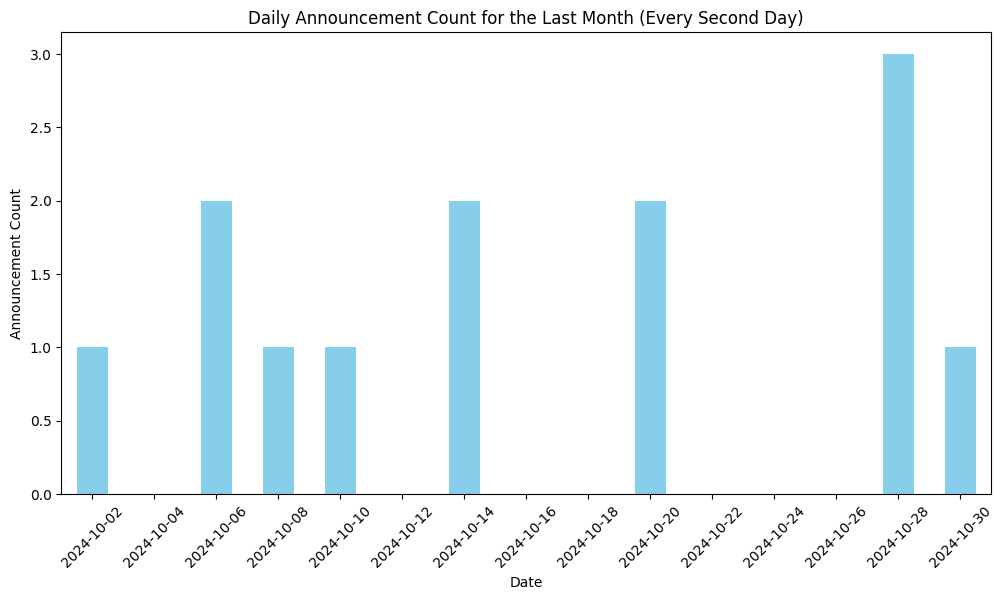

In [275]:
# Get the last month's daily counts
daily_counts_last_month = daily_counts.loc[end_date - pd.DateOffset(months=1):end_date]

# Filter to include only every second day
daily_counts_last_month = daily_counts_last_month[daily_counts_last_month.index.day % 2 == 0]

# Format the index to display only the date without the time
daily_counts_last_month.index = daily_counts_last_month.index.strftime('%Y-%m-%d')

# Plot daily announcement counts for the last month, showing only every second day
plt.figure(figsize=(12, 6))
daily_counts_last_month.plot(kind='bar', color='skyblue')
plt.title('Daily Announcement Count for the Last Month (Every Second Day)')
plt.xlabel('Date')
plt.ylabel('Announcement Count')
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()
